In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

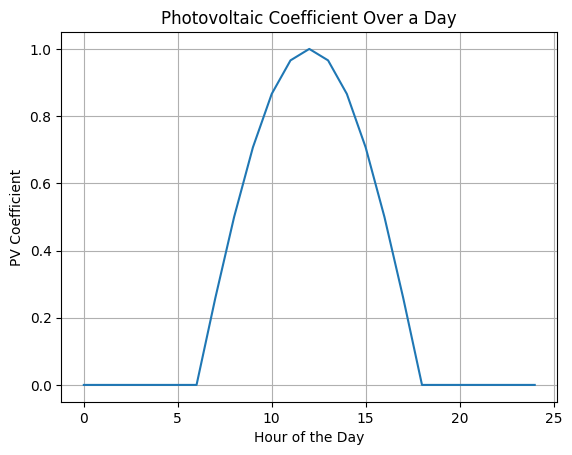

,Hour,Coefficient
0,0,0.000000e+00
1,1,0.000000e+00
2,2,0.000000e+00
3,3,0.000000e+00
4,4,0.000000e+00
5,5,0.000000e+00
6,6,0.000000e+00
7,7,2.588190e-01
8,8,5.000000e-01
9,9,7.071068e-01


In [ ]:
# Photovoltaic coefficient 0 to 1 over 1 day
def pv_coefficient():
    hours = list(range(0, 25))
    # sine wave from 0 to 1 from 6 to 18
    coeff = [0 if h < 6 or h > 18 else np.sin((h-6)/12 * np.pi) for h in hours]
    df = pd.DataFrame({"Hour": hours, "Coefficient": coeff})
    plt.plot(df["Hour"], df["Coefficient"])
    plt.xlabel("Hour of the Day")
    plt.ylabel("PV Coefficient")
    plt.title("Photovoltaic Coefficient Over a Day")
    plt.grid(True)
    plt.show()
    return df

pv_coefficient()

In [30]:
# Load the template JSON file
with open('data/demand.json') as f:
    demand = json.load(f)

In [ ]:
# demand[1]["data"]["data"] is  a dict with keys are yyyy-mm-ddThh:mm:ss and values are float
values = list(demand[1]["data"]["data"].values())
max_value = max(values)
norm_values = [0.017*v / max_value for v in values]
# Replace the values in the JSON structure
for i, key in enumerate(demand[1]["data"]["data"].keys()):
    demand[1]["data"]["data"][key] = norm_values[i]
# Save the modified JSON to a new file
with open('data/demand_modified.json', 'w') as f:
    json.dump(demand, f, indent=4)

TypeError: can't multiply sequence by non-int of type 'float'